<a href="https://colab.research.google.com/github/ERICK2500/Proyecto_CoderHouse/blob/main/ERICK_RAMOS_ZAPATA_2%C2%B0PREENTREGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA STORYTELLING AFILIADOS AL SEGURO INTEGRAL DE SALUD EN ESTADO ACTIVO**

---



---



En un mundo donde el acceso a la salud es fundamental para el bienestar de las personas, contar con un sistema de seguro integral se convierte en una necesidad imperativa. En este contexto, el presente análisis se enfoca en explorar y comprender los patrones y tendencias relacionados con los afiliados al Seguro Integral de Salud (SIS) en estado activo en Perú. Con un conjunto de datos detallado que abarca diversas variables demográficas y de afiliación, nos sumergimos en el mundo de la salud pública para extraer información valiosa que pueda contribuir a mejorar la calidad y accesibilidad de los servicios de salud para todos los asegurados. A través de un análisis exhaustivo, buscamos identificar insights clave que puedan informar políticas, decisiones estratégicas y acciones destinadas a fortalecer y optimizar el sistema de salud en beneficio de la comunidad peruana.

Vamos a plantear nuestras incongintas y nuestras hipotesis.


¿existen variaciones significativas en la distribución demográfica de los afiliados al Seguro Integral de Salud, evidenciadas por diferencias en la edad, distribución geográfica y tipo de seguro, lo que podría influir en la accesibilidad y el uso de los servicios de salud en diferentes regiones?

Hipotesis:Se espera que existan variaciones significativas en la distribución demográfica de los afiliados al Seguro Integral de Salud, evidenciadas por diferencias en la edad, distribución geográfica y tipo de seguro, lo que podría influir en la accesibilidad y el uso de los servicios de salud en diferentes regiones



### Llamamos nuestros datos.

Nuestro dataset contiene 20 columnas o variables, de las cuales nos enfocaremos en las mas importantes para el estudio como son:

REGION
PROVINCIA
DISTRITO
AMBITO_INEI
NACIONAL_EXTRANJERO
PAIS_EXTRANJERO
DOCUMENTO_IDENTIDAD
EDAD
SEXO
REGIMEN_FINANCIAMIENTO
PLAN_DE_SEGURO

In [1]:
# Importo librerias
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
import numpy as np
import locale
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingClassifier
from statsmodels.tsa.stattools import adfuller
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
# @title
# Conecto Drive a Google Colab
from google.colab import drive
import os
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive'
# @title
df=pd.read_excel('AFILIADOS1.xlsx')
df.head()

Mounted at /content/gdrive
/content/gdrive/MyDrive


,FECHA_CORTE,REGION,PROVINCIA,DISTRITO,UBIGEO,COD_UNIDAD_EJECUTORA,UNIDAD_EJECUTORA,AMBITO_INEI,CODIGO_IPRESS,IPRESS,VRAEM,NACIONAL_EXTRANJERO,PAIS_EXTRANJERO,DOCUMENTO_IDENTIDAD,EDAD,SEXO,REGIMEN_FINANCIAMIENTO,PLAN_DE_SEGURO,COBERTURA_FINANCIERA,TOTAL_AFILIADOS
0,2021-04-30,CALLAO,PROV. CONST. DEL CALLAO,VENTANILLA,70106,1316,REGION CALLAO - DIRECCION DE SALUD I CALLAO,URBANA,7314,C.S. MATERNO INFANTIL PACHACUTEC PERU-COREA,NO,NACIONAL,NaN,D.N.I.,37,MASCULINO,SUBSIDIADO,SIS GRATUITO,PEAS + PC,303
1,2021-04-30,LIMA METROPOLITANA,LIMA,SURQUILLO,150141,1683,DIRECCION DE REDES INTEGRADAS DE SALUD LIMA CE...,URBANA,6178,CENTRO DE SALUD MATERNO INFANTIL SURQUILLO,NO,NACIONAL,NaN,D.N.I.,35,FEMENINO,SUBSIDIADO,SIS GRATUITO,PEAS + PC,94
2,2021-04-30,LIMA METROPOLITANA,LIMA,LURIN,150119,1685,DIRECCION DE REDES INTEGRADAS DE SALUD LIMA SUR,URBANA,6079,CENTRO MATERNO INFANTIL LURIN,NO,NACIONAL,NaN,D.N.I.,66,MASCULINO,SUBSIDIADO,SIS GRATUITO,PEAS + PC,32
3,2021-04-30,PUNO,MELGAR,ORURILLO,210807,915,REGION PUNO - SALUD MELGAR,RURAL,3177,ORURILLO,NO,NACIONAL,NaN,D.N.I.,19,FEMENINO,SUBSIDIADO,SIS GRATUITO,PEAS + PC,50
4,2021-04-30,LIMA METROPOLITANA,LIMA,ANCÓN,150102,1684,DIRECCION DE REDES INTEGRADAS DE SALUD LIMA NORTE,URBANA,5823,CENTRO DE SALUD VILLA ESTELA,NO,NACIONAL,NaN,D.N.I.,40,FEMENINO,SUBSIDIADO,SIS GRATUITO,PEAS + PC,86


### PROCESO DE LIMPIEZA DE DATOS

---

Para una mejor lectura y analisis realizamos una limpieza de datos, eliminando columnas no deseadas, valores nulos entre otros valores irrelevantes.

Analisamos si en nuestra base de datos residen valores nulos

In [2]:
# @title
missing_data = df.isnull()
missing_data.head(5)

,FECHA_CORTE,REGION,PROVINCIA,DISTRITO,UBIGEO,COD_UNIDAD_EJECUTORA,UNIDAD_EJECUTORA,AMBITO_INEI,CODIGO_IPRESS,IPRESS,VRAEM,NACIONAL_EXTRANJERO,PAIS_EXTRANJERO,DOCUMENTO_IDENTIDAD,EDAD,SEXO,REGIMEN_FINANCIAMIENTO,PLAN_DE_SEGURO,COBERTURA_FINANCIERA,TOTAL_AFILIADOS
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


Calculamos la cantidad de valores nulos por cada columna

In [3]:
# @title
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

FECHA_CORTE
FECHA_CORTE
False    1048575
Name: count, dtype: int64

REGION
REGION
False    1048575
Name: count, dtype: int64

PROVINCIA
PROVINCIA
False    1048575
Name: count, dtype: int64

DISTRITO
DISTRITO
False    1048575
Name: count, dtype: int64

UBIGEO
UBIGEO
False    1048575
Name: count, dtype: int64

COD_UNIDAD_EJECUTORA
COD_UNIDAD_EJECUTORA
False    1048575
Name: count, dtype: int64

UNIDAD_EJECUTORA
UNIDAD_EJECUTORA
False    1048575
Name: count, dtype: int64

AMBITO_INEI
AMBITO_INEI
False    1048575
Name: count, dtype: int64

CODIGO_IPRESS
CODIGO_IPRESS
False    1048575
Name: count, dtype: int64

IPRESS
IPRESS
False    1048575
Name: count, dtype: int64

VRAEM
VRAEM
False    1048575
Name: count, dtype: int64

NACIONAL_EXTRANJERO
NACIONAL_EXTRANJERO
False    1048575
Name: count, dtype: int64

PAIS_EXTRANJERO
PAIS_EXTRANJERO
True     1024477
False      24098
Name: count, dtype: int64

DOCUMENTO_IDENTIDAD
DOCUMENTO_IDENTIDAD
False    1048575
Name: count, dtype: int64

EDAD
EDAD
F

Nuestro analisis nos muestra que  hay valores nulos en la columna PAIS_EXTRANJERO.

Estos valores vacios no indican que no imigraron de un pais extranjero, por ende son peruano de nacimiento.

Para ello cambiaremos los valores Nulos por "Perú".

In [4]:
# @title
#reemplazamos los valores nulos por "Perú"
df.replace(np.NAN, "Peru" , inplace = True)
df.head(5)

,FECHA_CORTE,REGION,PROVINCIA,DISTRITO,UBIGEO,COD_UNIDAD_EJECUTORA,UNIDAD_EJECUTORA,AMBITO_INEI,CODIGO_IPRESS,IPRESS,VRAEM,NACIONAL_EXTRANJERO,PAIS_EXTRANJERO,DOCUMENTO_IDENTIDAD,EDAD,SEXO,REGIMEN_FINANCIAMIENTO,PLAN_DE_SEGURO,COBERTURA_FINANCIERA,TOTAL_AFILIADOS
0,2021-04-30,CALLAO,PROV. CONST. DEL CALLAO,VENTANILLA,70106,1316,REGION CALLAO - DIRECCION DE SALUD I CALLAO,URBANA,7314,C.S. MATERNO INFANTIL PACHACUTEC PERU-COREA,NO,NACIONAL,Peru,D.N.I.,37,MASCULINO,SUBSIDIADO,SIS GRATUITO,PEAS + PC,303
1,2021-04-30,LIMA METROPOLITANA,LIMA,SURQUILLO,150141,1683,DIRECCION DE REDES INTEGRADAS DE SALUD LIMA CE...,URBANA,6178,CENTRO DE SALUD MATERNO INFANTIL SURQUILLO,NO,NACIONAL,Peru,D.N.I.,35,FEMENINO,SUBSIDIADO,SIS GRATUITO,PEAS + PC,94
2,2021-04-30,LIMA METROPOLITANA,LIMA,LURIN,150119,1685,DIRECCION DE REDES INTEGRADAS DE SALUD LIMA SUR,URBANA,6079,CENTRO MATERNO INFANTIL LURIN,NO,NACIONAL,Peru,D.N.I.,66,MASCULINO,SUBSIDIADO,SIS GRATUITO,PEAS + PC,32
3,2021-04-30,PUNO,MELGAR,ORURILLO,210807,915,REGION PUNO - SALUD MELGAR,RURAL,3177,ORURILLO,NO,NACIONAL,Peru,D.N.I.,19,FEMENINO,SUBSIDIADO,SIS GRATUITO,PEAS + PC,50
4,2021-04-30,LIMA METROPOLITANA,LIMA,ANCÓN,150102,1684,DIRECCION DE REDES INTEGRADAS DE SALUD LIMA NORTE,URBANA,5823,CENTRO DE SALUD VILLA ESTELA,NO,NACIONAL,Peru,D.N.I.,40,FEMENINO,SUBSIDIADO,SIS GRATUITO,PEAS + PC,86


#### Normalización del DataFrame

---

Filtro los datos del DataFrame que usaré.

In [5]:
# @title
# Lista de columnas que quiero conservar para el estudio
Afiliados = ['REGION', 'PROVINCIA', 'DISTRITO','AMBITO_INEI','NACIONAL_EXTRANJERO', 'PAIS_EXTRANJERO', 'DOCUMENTO_IDENTIDAD','EDAD','SEXO','REGIMEN_FINANCIAMIENTO','PLAN_DE_SEGURO',	'COBERTURA_FINANCIERA','TOTAL_AFILIADOS']

# Eliminar las columnas que no están en la lista
df2 = df[Afiliados]

# Mostrar por pantalla
print(df2)

                     REGION                PROVINCIA    DISTRITO AMBITO_INEI  \
0                    CALLAO  PROV. CONST. DEL CALLAO  VENTANILLA      URBANA   
1        LIMA METROPOLITANA                     LIMA   SURQUILLO      URBANA   
2        LIMA METROPOLITANA                     LIMA       LURIN      URBANA   
3                      PUNO                   MELGAR    ORURILLO       RURAL   
4        LIMA METROPOLITANA                     LIMA       ANCÓN      URBANA   
...                     ...                      ...         ...         ...   
1048570               CUSCO            LA CONVENCIÓN    INKAWASI       RURAL   
1048571            AREQUIPA                 CAYLLOMA        MACA      URBANA   
1048572             HUÁNUCO                     AMBO  SAN RAFAEL       RURAL   
1048573               JUNÍN                   SATIPO   RÍO TAMBO       RURAL   
1048574              LORETO                  UCAYALI   CONTAMANA      URBANA   

        NACIONAL_EXTRANJERO PAIS_EXTRAN



---



---



 Analisamos nuestro amplio dataset, y como saben, los datos nos cuentan historias, asi que vamos con el analisis de estos.



## Análisis exploratorio de datos (EDA)

---

A partir de las hipótesis previamente formuladas, se podrá profundizar, minuciosamente, en el análisis de las distribuciones y si los afiliados son nacionales o extranjeros


### Regiones más demandadas

---

Analizando el incremento que han experimentado las regiones, permitirá identificar las tendencias y anticipar cuáles serán las regiones con un crecimiento más significativo.

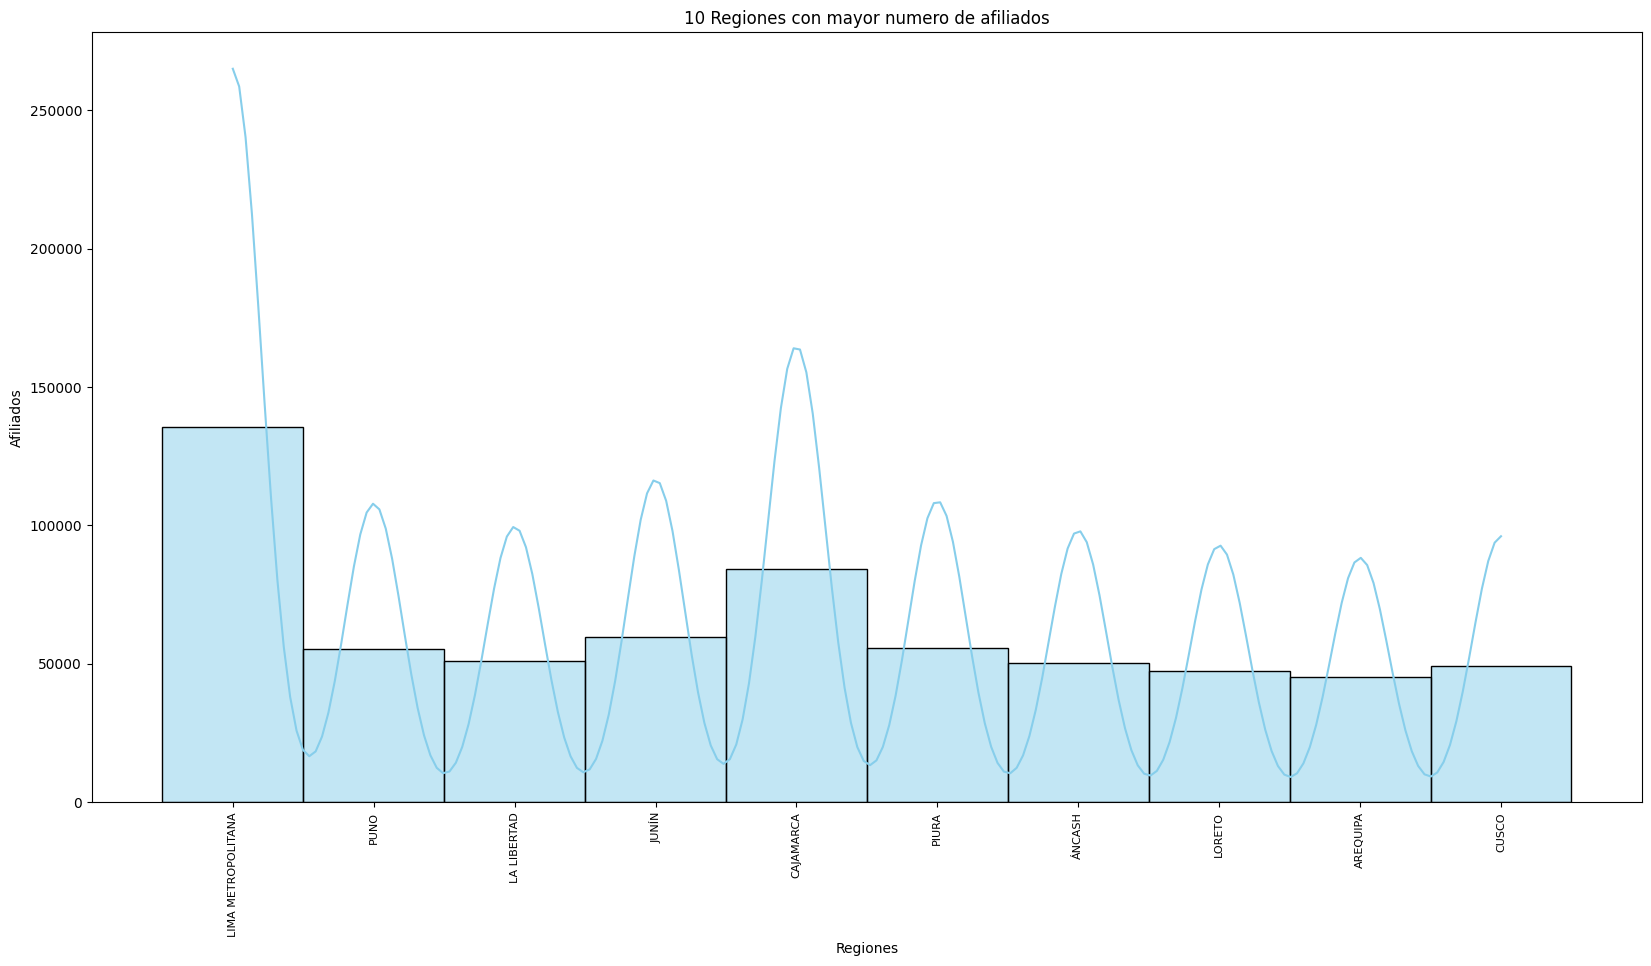

In [6]:
# @title
# Filtra los 100 artículos más comprados
top_10 = df2['REGION'].value_counts().nlargest(10).index
df_top_10 = df2[df2['REGION'].isin(top_10)]

# Configura el tamaño del gráfico
plt.figure(figsize=(20, 10))

# Crea un histograma con Seaborn
sns.histplot(df_top_10['REGION'], kde=True, color='skyblue')

# Personaliza la gráfica
plt.title('10 Regiones con mayor numero de afiliados')
plt.xlabel('Regiones')
plt.ylabel('Afiliados')

# Personaliza las marcas en el eje X
plt.xticks(rotation=90, fontsize=8)

# Muestra el gráfico
plt.show()

#### Interpretación de datos

---


Con la ayuda de este gráfico, podré obtener una comprensión más clara acerca de las reguiones que presentaran mas aumento en su numero de afiliados. Esto me permitirá entender las tendencias específicas de cada region y realizar un análisis más efectivo, orientándome hacia las direcciones relevantes.

## 1. Distribucion de afiliados por sus edades

---






Para empezar este analisis tenemos que conocer a que sector o rango de edad debemos enfocarnos mas. nuestro dataset contiene la suficiente informacion asi que analizamos, se tiene en cuenta que este analisis solo tomara como variable la edad.

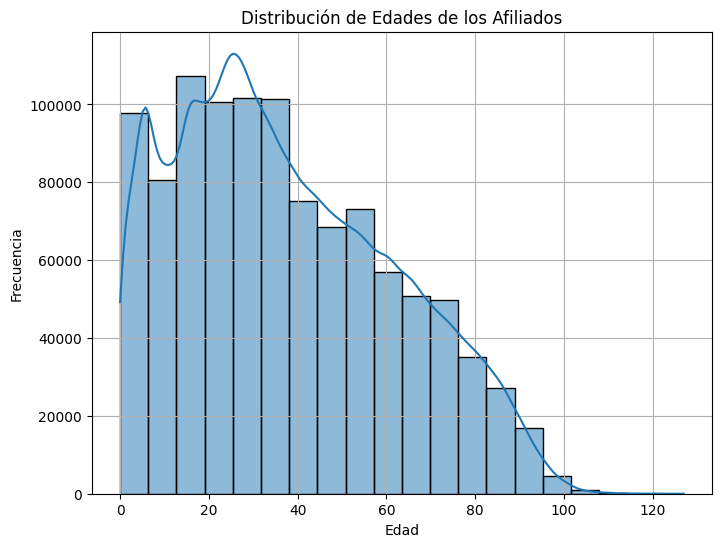

Resumen numérico para la edad:
 count    1.048575e+06
mean     3.765730e+01
std      2.429232e+01
min      0.000000e+00
25%      1.800000e+01
50%      3.400000e+01
75%      5.600000e+01
max      1.270000e+02
Name: EDAD, dtype: float64


In [7]:
# @title
# Histograma de la distribución de la edad
plt.figure(figsize=(8, 6))
sns.histplot(data=df2, x='EDAD', bins=20, kde=True)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edades de los Afiliados')
plt.grid(True)
plt.show()

# Resumen numérico básico para la edad
summary_edad = df2['EDAD'].describe()
print("Resumen numérico para la edad:\n", summary_edad)

 Interpretación de datos

---

De estos resultados, se desprenden dos conclusiones significativas:

El gráfico proporciona una visión clara del rango donde se encuentran el mayor numero de afiliados al SIS, el cual es de 0-40 años, ademas podemos observar que el promedio de edades es de 4 años una edad muy menor a la esperada. Estos datos se perfilan como fundamentales para la planificación de medidas para afiliados a partir de 40 años, ya que ofrecen una guía sobre que nuestros adultos mayores estan siendo desatendidos.


## 2. Distribución de afiliados según la edad y la region donde se ubican

---



Relacionando las variables “EDAD” y “REGION”, se busca conocer mejor el numero de afiliados por cada region y saber donde se deben implementar medidas.


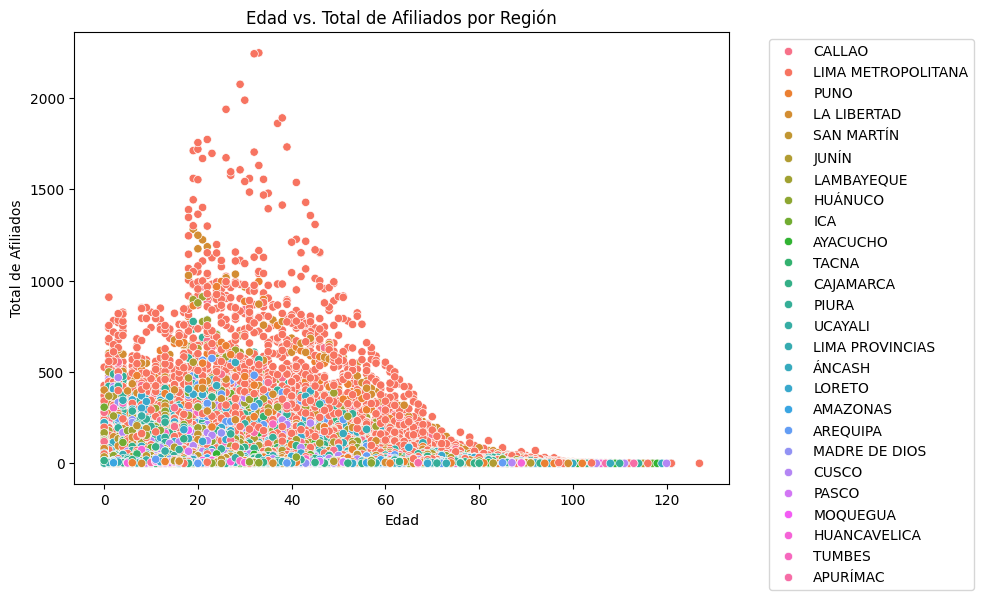

In [8]:
# @title
#realizamos un grafico de dispersion
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df2, x='EDAD', y='TOTAL_AFILIADOS', hue='REGION')
plt.xlabel('Edad')
plt.ylabel('Total de Afiliados')
plt.title('Edad vs. Total de Afiliados por Región')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [9]:
# @title
#analisamos la correlacion entre nuestras variables analisadas
summary_numeric = df2[['EDAD', 'TOTAL_AFILIADOS']].corr()
print("Correlacion entre Edas y Total de afiliados:\n", summary_numeric)


Correlacion entre Edas y Total de afiliados:
                      EDAD  TOTAL_AFILIADOS
EDAD             1.000000        -0.099713
TOTAL_AFILIADOS -0.099713         1.000000


#### Interpretación de datos

---

Utilizando estos datos, se optimizará y planificará de manera más eficiente implementacion de mejoras en el sistema en las regiones con mayor demanda de afiliados. Esta información permitirá obtener una vision para la region con mejoras a implemantar en el sistema de salud.


##3. Tipos de seguro por region

---

Relacionando las variables “Region”, "Tipo_seguro", podré saber si hay alguna relacion entre estas variables y si es que influye la region para la afiliacion.


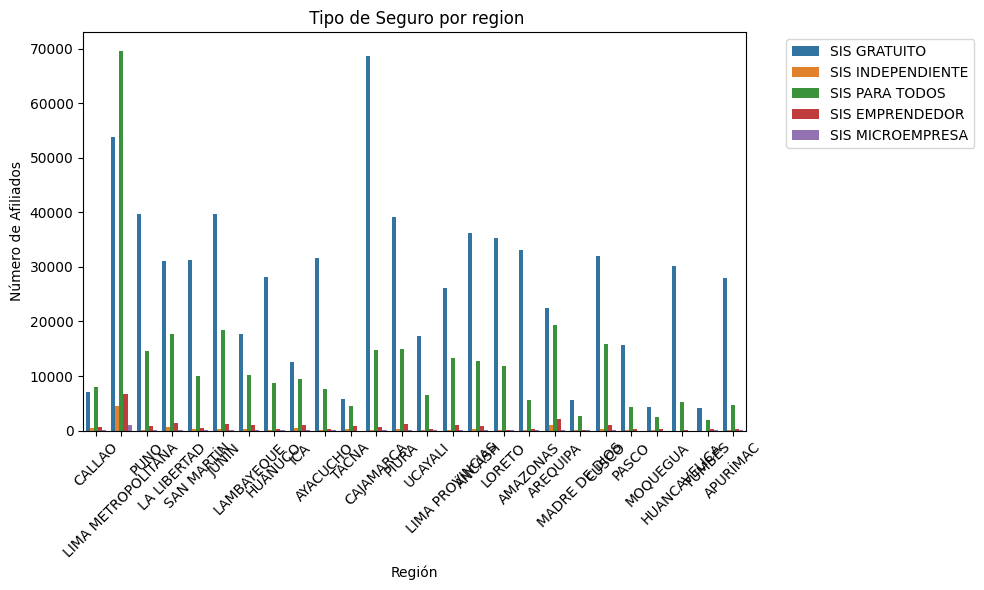

In [10]:
# @title
#realizamos un grafico de barras incluyendo las variables tipo de seguro y region
plt.figure(figsize=(10, 6))
sns.countplot(data=df2, x='REGION', hue='PLAN_DE_SEGURO')
plt.xlabel('Región')
plt.ylabel('Número de Afiliados')
plt.title(' Tipo de Seguro por region')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [11]:
# @title
#realizamos un resumen para cada plan de seguro
summary_numeric = df2.groupby('PLAN_DE_SEGURO')['TOTAL_AFILIADOS'].describe()
print("Resumen numérico para variables numéricas:\n", summary_numeric)

Resumen numérico para variables numéricas:
                       count       mean        std  min  25%  50%   75%     max
PLAN_DE_SEGURO                                                                
SIS EMPRENDEDOR     23767.0   1.482854   1.016997  1.0  1.0  1.0   2.0    17.0
SIS GRATUITO       696487.0  12.110044  27.362428  1.0  1.0  4.0  10.0   910.0
SIS INDEPENDIENTE   10114.0   1.408345   0.981563  1.0  1.0  1.0   1.0    14.0
SIS MICROEMPRESA     2973.0   1.473596   1.228746  1.0  1.0  1.0   1.0    17.0
SIS PARA TODOS     315234.0   8.597499  46.161920  1.0  1.0  1.0   3.0  2247.0


#### Interpretación de datos

---

Relacionando estas dos variables, se obtiene información crucial en nuestro estudio. Apreciamos que en la region Tacna predomina el SIS GRATUITO, mientras que en la region Callao predomina el SIS para todos. Contamos con una estimación aproximada del numero de afiliados por el tipo de SIS, las cantidades proporcionará una visión detallada de modelo de sis se debe implementar de acuerdo a con las prestaciones de cada persona


In [12]:
# @title
# Tabla de frecuencia cruzada para la cantidad de afiliados por región y tipo de seguro
tabla_frecuencia = pd.crosstab(df2['REGION'], df2['PLAN_DE_SEGURO'])

# Imprimir la tabla de frecuencia cruzada
print("Tabla de frecuencia cruzada para la cantidad de afiliados por Región y Tipo de Seguro:\n")
print(tabla_frecuencia)

Tabla de frecuencia cruzada para la cantidad de afiliados por Región y Tipo de Seguro:

PLAN_DE_SEGURO      SIS EMPRENDEDOR  SIS GRATUITO  SIS INDEPENDIENTE  \
REGION                                                                 
AMAZONAS                        233         33076                 69   
APURÍMAC                        212         28039                 26   
AREQUIPA                       2209         22494               1044   
AYACUCHO                        351         31590                 76   
CAJAMARCA                       635         68623                168   
CALLAO                          681          6994                432   
CUSCO                           959         32009                299   
HUANCAVELICA                    150         30154                 12   
HUÁNUCO                         381         28128                101   
ICA                            1109         12562                418   
JUNÍN                          1220         3964

#### Interpretación de datos

---
Con esta tabla de frecuencias podemos observar la cantidad de afiliados a los distintos seguros en cada una de las regiones. nos detalla de manera mas clara las regiones con mayor cantidad de afiliados


# Selección de algoritmos de Machine Learning

---

Basándome en las hipótesis y en el análisis exploratorio de datos, he elegido los siguientes algoritmos para abordar los problemas de regresión y clasificación. Esta selección posibilitará un estudio detallado a través de entrenamientos con datos y el uso de métricas específicas para calcular valores. El objetivo final es realizar predicciones para los diversos problemas previamente mencionados.

### Regresión

---

Para predecir si el siguiente asegurado sera Nacional o Extranjero, puedo usar **Árbol de decisión**


### Siguiente asegurado sera Nacional o Extranjero

### Normalizacion de datos.


---


Seleccionamos que variables son significantes para nuestro estudio

In [13]:
X=df.drop(columns=['REGION','FECHA_CORTE','PAIS_EXTRANJERO','PROVINCIA','DISTRITO','UBIGEO','NACIONAL_EXTRANJERO','COD_UNIDAD_EJECUTORA','UNIDAD_EJECUTORA','CODIGO_IPRESS',	'IPRESS','TOTAL_AFILIADOS'])
Y=df['NACIONAL_EXTRANJERO']

In [14]:
#from sklearn.preprocessing import LabelEncoder
#lab = LabelEncoder()
#X['REGION'] = lab.fit_transform(X['REGION'])

In [15]:
X.head()

,AMBITO_INEI,VRAEM,DOCUMENTO_IDENTIDAD,EDAD,SEXO,REGIMEN_FINANCIAMIENTO,PLAN_DE_SEGURO,COBERTURA_FINANCIERA
0,URBANA,NO,D.N.I.,37,MASCULINO,SUBSIDIADO,SIS GRATUITO,PEAS + PC
1,URBANA,NO,D.N.I.,35,FEMENINO,SUBSIDIADO,SIS GRATUITO,PEAS + PC
2,URBANA,NO,D.N.I.,66,MASCULINO,SUBSIDIADO,SIS GRATUITO,PEAS + PC
3,RURAL,NO,D.N.I.,19,FEMENINO,SUBSIDIADO,SIS GRATUITO,PEAS + PC
4,URBANA,NO,D.N.I.,40,FEMENINO,SUBSIDIADO,SIS GRATUITO,PEAS + PC


Aplicamos Get Dummies para convertir las variables categóricas en variables numéricas

In [16]:
import pandas as pd
X_NEW = pd.get_dummies(X, columns=['AMBITO_INEI','VRAEM','DOCUMENTO_IDENTIDAD','SEXO','REGIMEN_FINANCIAMIENTO','PLAN_DE_SEGURO','COBERTURA_FINANCIERA'],dtype=float)

In [17]:
X_NEW.head()

,EDAD,AMBITO_INEI_RURAL,AMBITO_INEI_URBANA,VRAEM_NO,VRAEM_SI,DOCUMENTO_IDENTIDAD_CARNÉ DE EXTRANJERíA,DOCUMENTO_IDENTIDAD_D.N.I.,DOCUMENTO_IDENTIDAD_NO CUENTA CON DOCUMENTO DE IDENTIDAD,SEXO_FEMENINO,SEXO_MASCULINO,REGIMEN_FINANCIAMIENTO_SEMICONTRIBUTIVO,REGIMEN_FINANCIAMIENTO_SUBSIDIADO,PLAN_DE_SEGURO_SIS EMPRENDEDOR,PLAN_DE_SEGURO_SIS GRATUITO,PLAN_DE_SEGURO_SIS INDEPENDIENTE,PLAN_DE_SEGURO_SIS MICROEMPRESA,PLAN_DE_SEGURO_SIS PARA TODOS,COBERTURA_FINANCIERA_PEAS,COBERTURA_FINANCIERA_PEAS + PC
0,37,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,35,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,66,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,19,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,40,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


#### Asignamos las variables para poder realizar el metodo random forest, y asi hacer el entrenamiento y la prueba de nuestro modelo.
---



#### APLICAMOS METODO RANDOM FOREST

---


Aplicamos nuestro primero modelo de prediccion.

precisión: 0.994529376065659
Matriz de confusión:
[[  6551   1383]
 [   510 337586]]
Reporte de clasificacion:
              precision    recall  f1-score   support

  EXTRANJERO       0.93      0.83      0.87      7934
    NACIONAL       1.00      1.00      1.00    338096

    accuracy                           0.99    346030
   macro avg       0.96      0.91      0.94    346030
weighted avg       0.99      0.99      0.99    346030



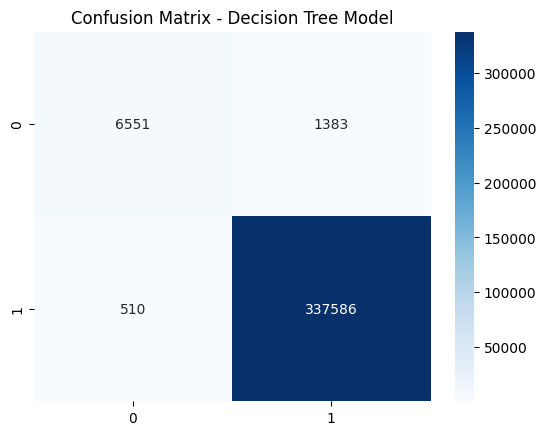

In [26]:
# @title
# Dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_NEW, Y, test_size=0.33, random_state=42)

# Entrenar el arbol
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=6, min_samples_leaf=5, random_state=4)
clf = clf.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred= clf.predict(X_test)

# Calcular métricas de evaluación
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)


# Visualizar las métricas
print(f"precisión: {accuracy}")
print("Matriz de confusión:")
print(conf_matrix)
print("Reporte de clasificacion:")
print(classification_rep)


# Visualizar la matriz de confusión para el modelo de Árboles de Decisión
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix - Decision Tree Model")
plt.show()

Interpretacion


---


El modelo tiene un rendimiento general muy bueno, con una precisión global del 99%. Esto sugiere que el modelo es capaz de clasificar correctamente la gran mayoría de las instancias.

Graficamos


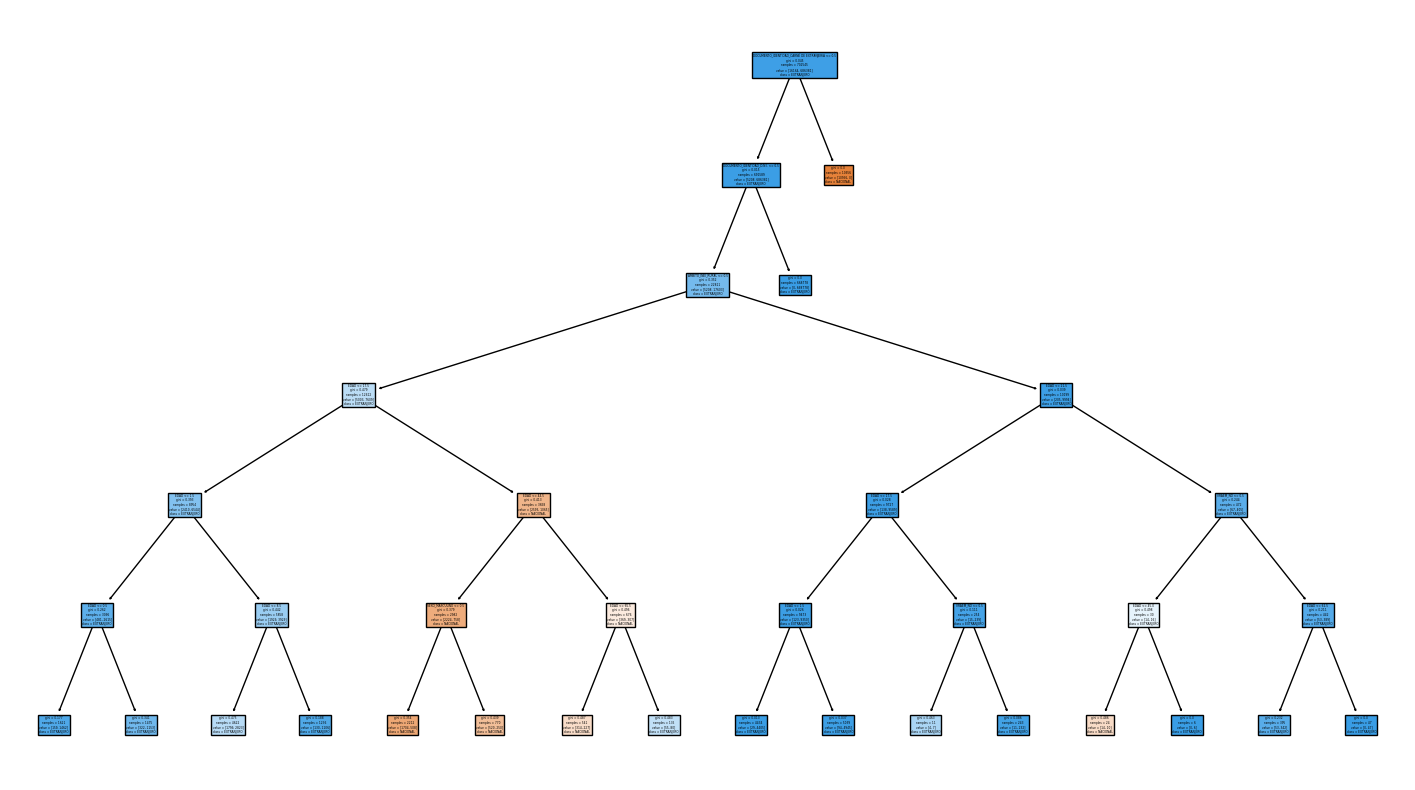

In [27]:
# Graficando
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(18,10))
_ = tree.plot_tree(clf,feature_names=X_train.columns,
                   class_names=y_train.unique(),
                   filled=True)

### SVM

In [31]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Preprocesado y modelado
# ==============================================================================
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')


Y.values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X_NEW,Y.values.reshape(-1,1),train_size= 0.75,\
                                                    random_state = 42,shuffle=True)

 # Creación del modelo SVM
modelo = SVC(C=1,kernel='linear',random_state=42)
modelo.fit(X_train, y_train)

#Predicciones!
y_train_pred = modelo.predict(X_train)
y_test_pred = modelo.predict(X_test)

#Calculo el accuracy en Test
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, y_test_pred)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.9938926696777344


El modelo tiene una precision del 99% , siendo muy efectivo para predecir si el asegurado es nacional o extranjero.



## REGRESION LOGISTICA
---



In [32]:
X1=df.drop(columns=['REGION','EDAD','FECHA_CORTE','PAIS_EXTRANJERO','PROVINCIA','DISTRITO','UBIGEO','NACIONAL_EXTRANJERO','COD_UNIDAD_EJECUTORA','UNIDAD_EJECUTORA','CODIGO_IPRESS',	'IPRESS','TOTAL_AFILIADOS'])
Y1=df['EDAD']

import pandas as pd
X_NEW1 = pd.get_dummies(X1, columns=['AMBITO_INEI','VRAEM','DOCUMENTO_IDENTIDAD','SEXO','REGIMEN_FINANCIAMIENTO','PLAN_DE_SEGURO','COBERTURA_FINANCIERA'],dtype=float)

#Separacion en train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_NEW1, Y1, test_size=0.2, random_state=42)

#Entrenamiento del modelo
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

#Realizando las predicciones
y_pred = regressor.predict(X_test)
y_pred



array([40.65625  , 33.5234375, 40.578125 , ..., 40.65625  , 33.3046875,
       40.671875 ])

Para comparar los valores de salida reales X_test con los valores predichos, convertimos en df1:

In [33]:
df1= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1['Sesgo']=df1.Actual -df1.Predicted
df1['Error_porc']=((df1.Actual -df1.Predicted)/df1.Actual) *100
df1

,Actual,Predicted,Sesgo,Error_porc
781974,6,40.656250,-34.656250,-577.604167
937737,29,33.523438,-4.523438,-15.598060
907828,33,40.578125,-7.578125,-22.964015
784628,65,40.875000,24.125000,37.115385
662460,11,40.578125,-29.578125,-268.892045
...,...,...,...,...
673443,46,33.523438,12.476562,27.122962
656736,15,33.617188,-18.617188,-124.114583
858501,25,40.656250,-15.656250,-62.625000
617079,56,33.304688,22.695312,40.527344


encontramos el R_square para varificar la precision del modelo

In [34]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)

# Imprime el valor de R-squared
print("R-squared:", r_squared)


R-squared: 0.06756957064785551


el modelo de regresion multiple para predecir las edades de los asegurados nos muestra el valor de R-squared de aproximadamente 0.0676 indica que el modelo de regresión explica aproximadamente el 6.76% de la variabilidad de los datos observados. Esto significa que el modelo no está capturando una gran parte de la variación en la variable objetivo y, por lo tanto, puede no ser muy efectivo para hacer predicciones precisas.

# Análisis y Comparación:
Todos los modelos tienen una alta precisión en la clase 0, pero varían en su rendimiento en la clase 1.

El modelo de Árboles de Decisión tiene una tasa de falsos positivos en la clase 1, pero su precisión es 100%, lo cual puede indicar cierta tendencia al sobreajuste.

El modelo KNN tiene un recall del 100% en la clase 1, pero su precisión es más baja, sugiriendo que puede haber algunos falsos positivos.

# FORMAS DE MEJORA
En el modelo Arbol de decision puede haber una leve tendencia al overfitting debido a su precisión perfecta en la clase 1. Podría ser útil ajustar los hiperparámetros del árbol para controlar el crecimiento y evitar overfitting.


En el modelo vecinos mas cercanos puede haber una tendencia a overfitting, especialmente si el modelo está considerando demasiados vecinos. Podríamos ajustar el parámetro n_neighbors para ver cómo afecta al rendimiento.


En el modelo de regresion logistica no parece haber signos evidentes de overfitting o underfitting en la Regresión Logística en función de estas métricas.

### Insights

**Distribución Geográfica de los Afiliados**



*   La concentración de afiliados en Lima metropolitana sugiere una alta demanda deservicios de salud en esta área urbana densamente poblada. Esto podría indicar la necesidad de una mayor atención y recursos en términos de infraestructura y personal de salud
*  La presencia significativa de afiliados en regiones como Cajamarca, Junín y Piura podría reflejar la distribución de la población en áreas urbanas y rurales, así como también factores socioeconómicos y de acceso a la salud en esas regiones específicas.

**Tipo de Seguro y Cobertura Financiera**


*   La popularidad del SIS PARA TODOS y el SIS GRATUITO sugiere una preferencia por los planes de seguro que ofrecen una cobertura más amplia y acceso gratuito a los servicios de salud. Esto podría indicar una alta demanda de servicios de salud asequibles y accesibles en todo el país.

*   Sería importante evaluar cómo estas preferencias se traducen en términos de acceso efectivo a la atención médica y la calidad de los servicios proporcionados bajo estos planes de seguro.

**Rangos de Edad**


*   El predominio de afiliados en el rango de edad de 18 a 35 años destaca la importancia de garantizar la cobertura de seguro de salud para los jóvenes adultos, especialmente en un momento en que están estableciendo su independencia financiera y acceso a la atención médica.

*   Esto también podría indicar una brecha en la cobertura de seguro para niños y adolescentes menores de 18 años, lo que sugiere la necesidad de políticas o programas destinados a garantizar una cobertura universal para todas las edades.





### Recomendaciones



**Mejora de la Infraestructura y Recursos en Lima Metropolitana:**

Dado el alto número de afiliados en Lima metropolitana, sería importante invertir en la mejora de la infraestructura de salud y aumentar la disponibilidad de recursos médicos y personal en esta área para satisfacer la demanda creciente de servicios de salud.

**Extensión de la Cobertura en Áreas Rurales:**

Para abordar las necesidades de áreas con grandes volúmenes de asegurados como Cajamarca, Junín y Piura, se podrían implementar estrategias para mejorar el acceso a la atención médica en áreas rurales, como la creación de centros de salud comunitarios y la implementación de programas de telemedicina.

**Promoción de los Planes de Seguro SIS PARA TODOS y SIS GRATUITO:**

Dado su alto nivel de popularidad, se podrían realizar campañas de sensibilización para promover los beneficios de los planes de seguro SIS PARA TODOS y SIS GRATUITO, destacando su cobertura amplia y accesible para la población peruana.

**Ampliación de la Cobertura para Grupos Demográficos Específicos:**

Se podrían implementar programas específicos para ampliar la cobertura de seguro para grupos demográficos subrepresentados, como niños y adolescentes menores de 18 años, garantizando que tengan acceso a la atención médica necesaria.

**Incorporación de Servicios Preventivos y de Promoción de la Salud:**

Se podría enfocar en la promoción de la salud y la prevención de enfermedades, ofreciendo servicios preventivos y programas de estilo de vida saludable dentro del marco de los planes de seguro SIS, con el objetivo de reducir la carga de enfermedades y mejorar los resultados de salud a largo plazo.

**Evaluación Continua y Adaptación de Políticas:**

Sería importante realizar una evaluación continua de las políticas de salud y los programas de seguro para garantizar que estén cumpliendo con sus objetivos y abordando las necesidades cambiantes de la población. Esto podría implicar la recolección y análisis de datos continuos para informar la toma de decisiones y la implementación de ajustes según sea necesario.